In [ ]:
# !wget https://developer.nvidia.com/compute/cuda/9.0/Prod/local_installers/cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64-deb
# !dpkg -i cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64-deb
# !apt-key add /var/cuda-repo-9-0-local/7fa2af80.pub
# !apt update -q
# !apt install cuda gcc-6 g++-6 -y -q
# !ln -s /usr/bin/gcc-6 /usr/local/cuda/bin/gcc
# !ln -s /usr/bin/g++-6 /usr/local/cuda/bin/g++

In [ ]:
# !curl -sSL "https://julialang-s3.julialang.org/bin/linux/x64/1.7/julia-1.7.3-linux-x86_64.tar.gz" -o julia.tar.gz
# !tar -xzf julia.tar.gz -C /usr --strip-components 1
# !rm -rf julia.tar.gz*
# !julia -e 'using Pkg; pkg"add IJulia; precompile"'

# Functional Approximations by NN and RF

Here we show how the function
$$
x \mapsto exp(4 x)
$$
can be easily approximated by a tree-based methods (Trees, Random Forest) and a neural network (2 Layered Neural Network)

## Functional Approximation by a Tree


In [2]:
#import packages
using Pkg
Pkg.add("Distributions")
Pkg.add("DecisionTree") 
Pkg.add("Plots")
using LinearAlgebra, DataFrames, Statistics, Random, Distributions,DecisionTree, Plots

   Resolving package versions...
  No Changes to `C:\Users\PC\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\PC\.julia\environments\v1.6\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\PC\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\PC\.julia\environments\v1.6\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\PC\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\PC\.julia\environments\v1.6\Manifest.toml`


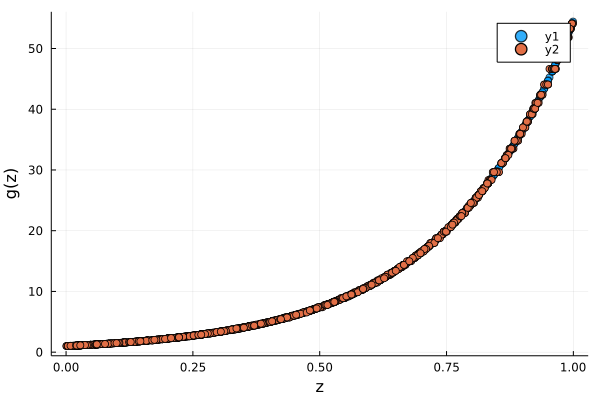

In [3]:
rand(1)
X_train = rand(1000,1)
f1 = x->exp(4*x)
Y_train = vec(f1.(X_train));

TreeModel = build_tree(Y_train, X_train)
# apply learned model
predTM = apply_tree(TreeModel, X_train)


scatter(X_train, Y_train, type="p", pch=19, xlab="z", ylab="g(z)",alpha=.8)
plot!(X_train, predTM, lt = :scatter )


---

Another method

In [7]:
Pkg.add("DecisionTree")
Pkg.add("ScikitLearn")
Pkg.add("PyPlot")
using DecisionTree, ScikitLearn, PyPlot

   Resolving package versions...
  No Changes to `C:\Users\PC\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\PC\.julia\environments\v1.6\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\PC\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\PC\.julia\environments\v1.6\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\PC\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\PC\.julia\environments\v1.6\Manifest.toml`


In [8]:
reg= DecisionTreeRegressor(pruning_purity_threshold = 0.1)

DecisionTreeRegressor
max_depth:                -1
min_samples_leaf:         5
min_samples_split:        2
min_purity_increase:      0.0
pruning_purity_threshold: 0.1
n_subfeatures:            0
root:                     nothing

In [10]:
#using DecisionTree: fit as fit
DecisionTree.fit!(reg, X_train,Y_train)

DecisionTreeRegressor
max_depth:                -1
min_samples_leaf:         5
min_samples_split:        2
min_purity_increase:      0.0
pruning_purity_threshold: 0.1
n_subfeatures:            0
root:                     Decision Tree
Leaves: 142
Depth:  10

In [11]:
predic1 = DecisionTree.predict(reg,X_train);

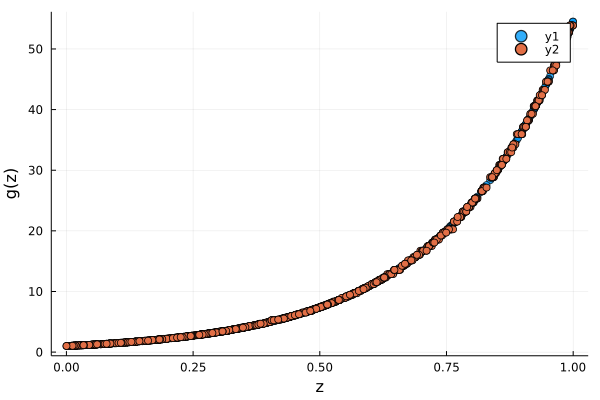

In [12]:
scatter(X_train, Y_train, type="p", pch=19, xlab="z", ylab="g(z)",alpha=.8)
scatter!(X_train,predic1   )

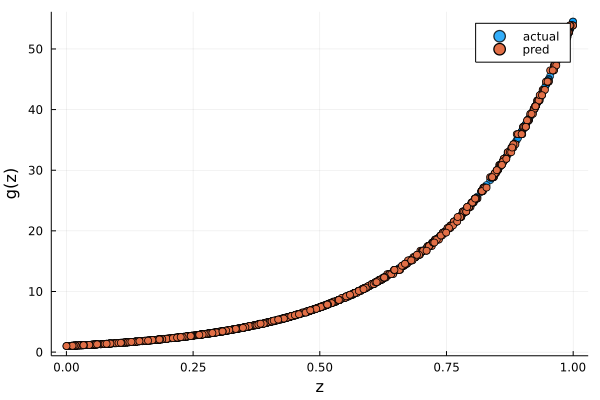

In [16]:
tree = DecisionTreeRegressor(pruning_purity_threshold = 0.5) #
DecisionTree.fit!(tree, X_train,Y_train)
pred2 = DecisionTree.predict(tree,X_train)
scatter(X_train, Y_train, type="p", pch=19, xlab="z", ylab="g(z)",alpha=.8, label = "actual")
scatter!(X_train,pred2 ,label = "pred")

---


## Functional Approximation by RF

Here we show how the function
$$
x \mapsto exp(4 x)
$$
can be easily approximated by a tree-based method (Random Forest) and a neural network (2 Layered Neural Network)

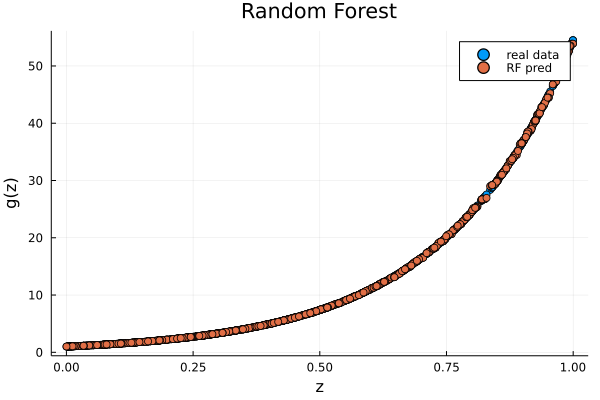

In [17]:
RFmodel = build_forest(Y_train, X_train)
pred_RF = apply_forest(RFmodel,X_train)
scatter(X_train, Y_train, type="p", pch=19, xlab="z", ylab="g(z)", label = "real data", title = "Random Forest")
scatter!(X_train,pred_RF, label= "RF pred")

## Boosted Trees

In [25]:
Pkg.add("JLBoost"),Pkg.add("StatsBase"),Pkg.add("MLJBase"),Pkg.add("MLJ")
Pkg.add(url ="https://github.com/Evovest/EvoTrees.jl") 
using StatsBase: sample
using EvoTrees,MLJBase, MLJ,JLBoost,EvoTrees

   Resolving package versions...
  No Changes to `C:\Users\PC\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\PC\.julia\environments\v1.6\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\PC\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\PC\.julia\environments\v1.6\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\PC\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\PC\.julia\environments\v1.6\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\PC\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\PC\.julia\environments\v1.6\Manifest.toml`
    Updating git-repo `https://github.com/Evovest/EvoTrees.jl`
   Resolving package versions...
  No Changes to `C:\Users\PC\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\PC\.julia\environments\v1.6\Manifest.toml`


In [26]:
tree_model = EvoTreeRegressor(loss=:linear, max_depth=4, η=0.01, nrounds=100)

EvoTreeRegressor(
    loss = EvoTrees.Linear(),
    nrounds = 100,
    λ = 0.0,
    γ = 0.0,
    η = 0.01,
    max_depth = 4,
    min_weight = 1.0,
    rowsample = 1.0,
    colsample = 1.0,
    nbins = 64,
    α = 0.5,
    metric = :mse,
    rng = MersenneTwister(123),
    device = "cpu") @756

In [27]:
mach = machine(tree_model, X_train, Y_train)

Machine{EvoTreeRegressor{Float64,…},…} @017 trained 0 times; caches data
  args: 
    1:	Source @677 ⏎ `AbstractMatrix{ScientificTypes.Continuous}`
    2:	Source @195 ⏎ `AbstractVector{ScientificTypes.Continuous}`


In [28]:
MLJ.fit!(mach)

┌ Info: Training Machine{EvoTreeRegressor{Float64,…},…} @017.
└ @ MLJBase C:\Users\PC\.julia\packages\MLJBase\KWyqX\src\machines.jl:342


Machine{EvoTreeRegressor{Float64,…},…} @017 trained 1 time; caches data
  args: 
    1:	Source @677 ⏎ `AbstractMatrix{ScientificTypes.Continuous}`
    2:	Source @195 ⏎ `AbstractVector{ScientificTypes.Continuous}`


In [29]:
yhat = MLJ.predict(mach, X_train);

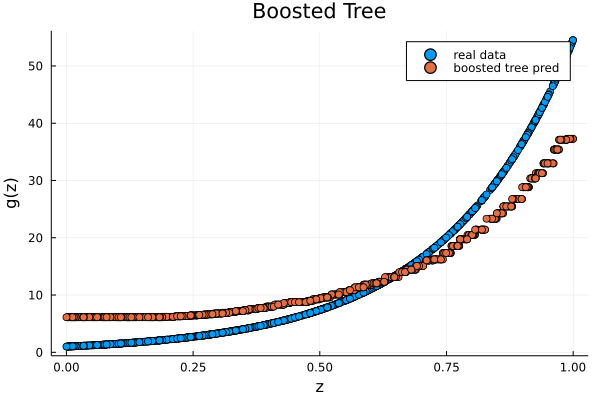

In [30]:
scatter(X_train, Y_train,type="p", pch=19, xlab="z", ylab="g(z)", label = "real data", title = "Boosted Tree")
scatter!(X_train, yhat, label = "boosted tree pred")

---

In [31]:
Pkg.add("XGBoost")
using  XGBoost
using XGBoost: predict as predict

   Resolving package versions...
  No Changes to `C:\Users\PC\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\PC\.julia\environments\v1.6\Manifest.toml`


In [38]:
bst = xgboost(X_train, 100, label = Y_train, eta = 0.01, max_depth = 4);

[1]	train-rmse:18.876593
[2]	train-rmse:18.691868
[3]	train-rmse:18.508989
[4]	train-rmse:18.327881
[5]	train-rmse:18.148575
[6]	train-rmse:17.971058
[7]	train-rmse:17.795252
[8]	train-rmse:17.621233
[9]	train-rmse:17.448864
[10]	train-rmse:17.278259
[11]	train-rmse:17.109264
[12]	train-rmse:16.942022
[13]	train-rmse:16.776306
[14]	train-rmse:16.612339
[15]	train-rmse:16.449865
[16]	train-rmse:16.289007
[17]	train-rmse:16.129822
[18]	train-rmse:15.972092
[19]	train-rmse:15.815914
[20]	train-rmse:15.661380
[21]	train-rmse:15.508253
[22]	train-rmse:15.356736
[23]	train-rmse:15.206606
[24]	train-rmse:15.058071
[25]	train-rmse:14.910873
[26]	train-rmse:14.765248
[27]	train-rmse:14.620919
[28]	train-rmse:14.478019
[29]	train-rmse:14.336637
[30]	train-rmse:14.196507
[31]	train-rmse:14.057889
[32]	train-rmse:13.920573
[33]	train-rmse:13.784621
[34]	train-rmse:13.649907
[35]	train-rmse:13.516484
[36]	train-rmse:13.384448
[37]	train-rmse:13.253679
[38]	train-rmse:13.124231
[39]	train-rmse:12.99

In [40]:
pred_xg = XGBoost.predict(bst, X_train);

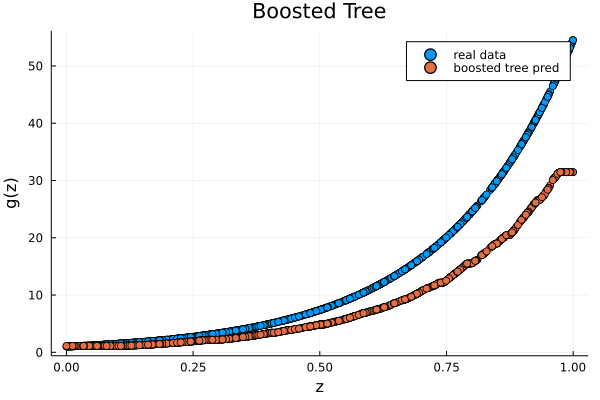

In [41]:
scatter(X_train, Y_train,type="p", pch=19, xlab="z", ylab="g(z)", label = "real data", title = "Boosted Tree")
scatter!(X_train, pred_xg, label = "boosted tree pred")

## Same Example with a Neural Network

In [1]:
using Pkg
Pkg.add("Flux")
Pkg.add("CUDA")
using Flux ,CUDA

    Updating registry at `C:\Users\PC\.julia\registries\General`
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
   Resolving package versions...
  No Changes to `C:\Users\PC\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\PC\.julia\environments\v1.6\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\PC\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\PC\.julia\environments\v1.6\Manifest.toml`


In [37]:
#building the model
layer1 = Dense(200, 200,relu)
layer2 = Dense(20, 20, relu  )
layer3 = Dense(1,1)
model = Chain( 
    layer1,
    layer2,
    layer3)


Chain(Dense(200, 200, relu), Dense(20, 20, relu), Dense(1, 1))

In [38]:
#building the predict function
predict = Dense(1000, 1000)

Dense(1000, 1000)

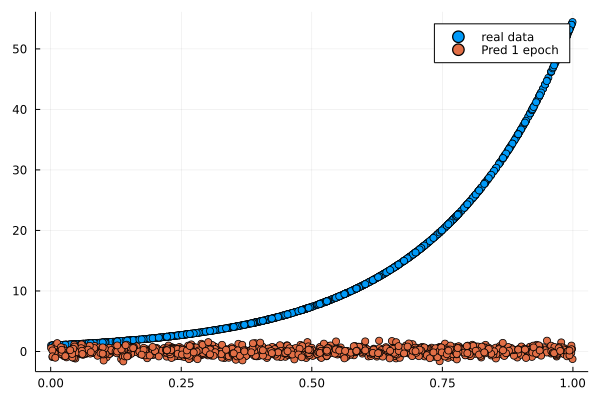

In [39]:
pred1 =  predict(X_train);
loss(x, y) = Flux.Losses.mse(predict(x), y)
loss(X_train, Y_train)
scatter(X_train, Y_train, label = "real data")
scatter!(X_train, pred1, label = "Pred 1 epoch")

In [40]:
loss(x, y) = Flux.Losses.mse(predict(x), y)
println("The MSE for this first prediction without optimizer is ", loss(X_train, Y_train))

The MSE for this first prediction without optimizer is 337.16081003955463


In [41]:
#we add a optimizer and join the data
opt = Descent()
data = [(X_train, Y_train)]

1-element Vector{Tuple{Matrix{Float64}, Vector{Float64}}}:
 ([0.9689090290325688; 0.31471100259046536; … ; 0.2663976530107113; 0.20701468772840603], [48.213357833162746, 3.521348491280118, 2.866427439356483, 8.272422817358601, 53.512866881993816, 14.529213760147783, 6.108768791529166, 19.672450641566268, 23.60526446409177, 2.954510831462392  …  4.408653805124879, 31.962469934004506, 14.977500601729055, 49.52996018680737, 3.388360418105015, 13.077868353751981, 13.46074438760623, 1.488868999465349, 2.90255276053667, 2.288871155686333])

In [42]:
predict.weight;
predict.bias;

In [43]:
parameters = Flux.params(predict)

Params([Float32[-0.013528538 0.0005054379 … 0.03477837 -0.034057308; 0.022096576 0.012891116 … 0.045323372 0.035130866; … ; 0.033888526 -0.010750242 … 0.006573618 -0.045998964; -0.023219064 0.018195882 … 0.028697826 0.008215948], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]])

In [44]:
predict.weight in parameters, predict.bias in parameters

(true, true)

In [45]:
#training the model
using Flux: train!
train!(loss, parameters, data, opt)

The MSE for this second model with optimizer is 295.23456080214163


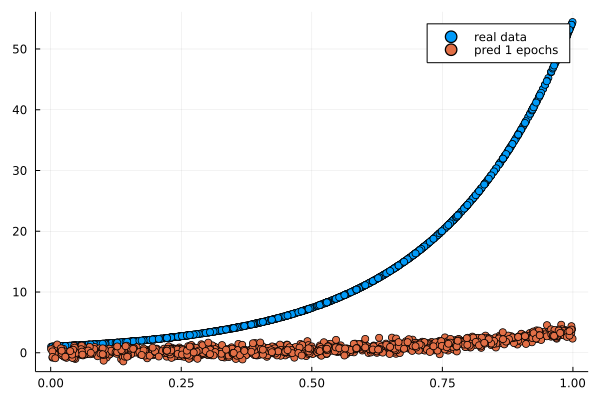

In [46]:
#the loss function change
println("The MSE for this second model with optimizer is ", loss(X_train, Y_train))
pred2 = predict(X_train)
scatter(X_train, Y_train, label = "real data")
scatter!(X_train, pred2, label = "pred 1 epochs")

In [47]:
#running 100 epochs
for epoch in 1:100
    train!(loss, parameters, data, opt)
  end

The MSE with 100 epochs is 0.0005048678966490891

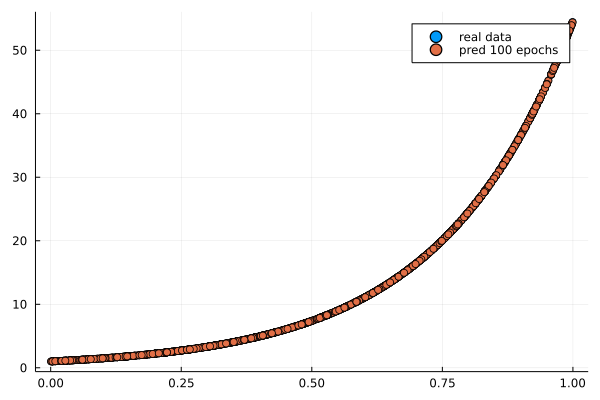

In [48]:
print("The MSE with 100 epochs is ",loss(X_train, Y_train))
pred100 = predict(X_train)
scatter(X_train, Y_train, label = "real data")
scatter!(X_train, pred100, label = "pred 100 epochs")
